## **Data Loading & Preprocessing**

### **Load Dataset**
 The code loads necessary libraries (pandas, numpy, matplotlib, sklearn) and the cleaned accident
dataset ('cleaned_data.csv').


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

df = pd.read_csv('cleaned_data.csv')  # Load cleaned accident data




### **Data Summary**  
**Actions:**  
- Drop target variable (Accident_Severity).  
- Remove missing values.  

In [7]:
df = df.drop(columns=['Accident_Severity'])  # Drop target variable
df = df.dropna()                             # Remove missing values


The code standardizes the features using StandardScaler() to give each feature equal importance
in the clustering process.
 **Justification:**  
- Clustering requires complete data.  
- Standardization ensures equal feature weighting.  

In [8]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


## **Determine Optimal Clusters (K)**

# **k selection:**
# **Silhouette Method**
 Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1], the closer to 1 the best the k value is


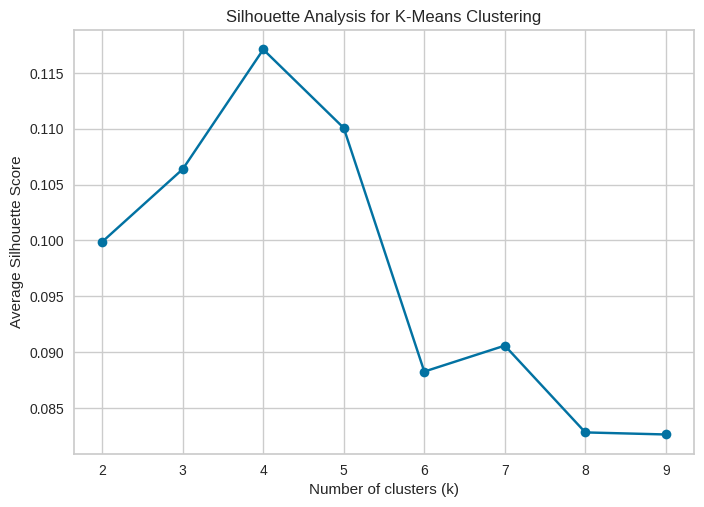

In [9]:
k_values = range(2, 10)
silhouette_avg_values = []
for k in k_values:
 kmeans = KMeans (n_clusters=k, random_state=43)
 kmeans_result = kmeans.fit(scaled_data)
 silhouette_avg = silhouette_score(scaled_data, kmeans_result.labels_)
 silhouette_avg_values.append(silhouette_avg)

 #Finding the first highest average Silhoutte score

highest_k = k_values[np.argmax(silhouette_avg_values)]
highest_score = max(silhouette_avg_values)

# Finding the second highest average Silhouette score
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
secondHighest_score = silhouette_avg_values_sorted[1]
secondHighest_k = k_values[silhouette_avg_values.index(secondHighest_score)]
# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

### **Elbow Method**

The elbow method helps us choose the best number of clusters for K-means clustering. It works by testing different numbers of clusters and calculating how tightly grouped the data points are within each cluster. As we increase the number of clusters, the clusters get smaller and more compact, which reduces WCSS. However, after a certain point, adding more clusters doesn’t make much difference in compactness—this is the “elbow” point on the graph. The elbow point suggests the ideal number of clusters, as it shows where adding more clusters no longer improves the results much, so we can say that the elbow value is the third k we will choose for th k-means algorithm.

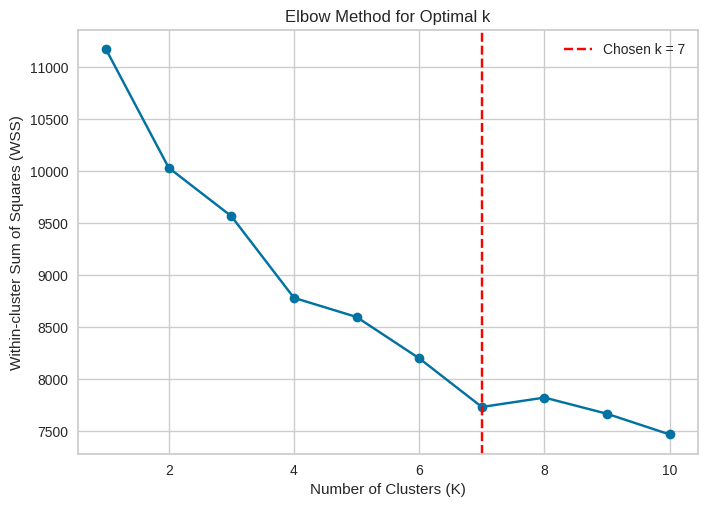

In [10]:
!pip install kneed
import kneed
from kneed import KneeLocator
# Standardize the data
wss_values = []
k_values = range (2, 11)
for k in k_values:
 kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto',random_state=1))
 kmeans.fit(scaled_data)
 wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

knee=KneeLocator(k_values,wss_values,curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point,linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend ()
plt.show()

## **Testing k-values for Clustering & Visualization**

### **k-means algorathem where k=4**

Cluster Centers:
[[-0.08553098  0.36077341 -0.22562988  0.34431396 -0.17989918  4.02171496
   4.28338252  0.07813578 -0.11149853 -0.11102141  0.31614657  0.28205463
   0.11958353  0.16655824]
 [ 0.04362713  0.08204593  0.05895899 -0.22926458 -0.09180954 -0.05826181
  -0.06362926 -0.11685098 -0.13533793 -0.0533158  -0.95252446 -0.92470491
  -0.17990305  0.01426808]
 [ 0.15166996  0.08754126  0.29770231 -0.06122675 -0.1663349  -0.17824428
  -0.11165898 -0.26209457  0.19089592  0.13042538  0.95233073  0.96420421
  -0.23218055 -0.18406055]
 [-0.24906179 -0.2775623  -0.44069186  0.39956694  0.37189206 -0.12127174
  -0.22450887  0.50309605 -0.01409751 -0.06737851  0.27097573  0.21609752
   0.56025663  0.18983045]]

Cluster Labels:
[2 2 3 0 2 1 1 1 2 1 3 3 2 2 3 3 3 1 1 3 2 2 1 3 1 2 2 3 2 2 2 1 1 3 1 3 1
 2 1 2 1 1 1 2 3 1 3 3 2 1 3 3 3 1 2 1 3 2 2 0 3 2 3 1 3 3 3 0 1 1 3 3 2 3
 2 1 2 2 1 1 1 1 2 2 1 3 3 3 3 1 2 2 1 1 3 3 1 1 3 0 1 3 1 1 3 2 1 1 2 2 1
 2 3 1 1 1 1 3 0 3 1 1 3 2 2 3 1 3 3 2 1

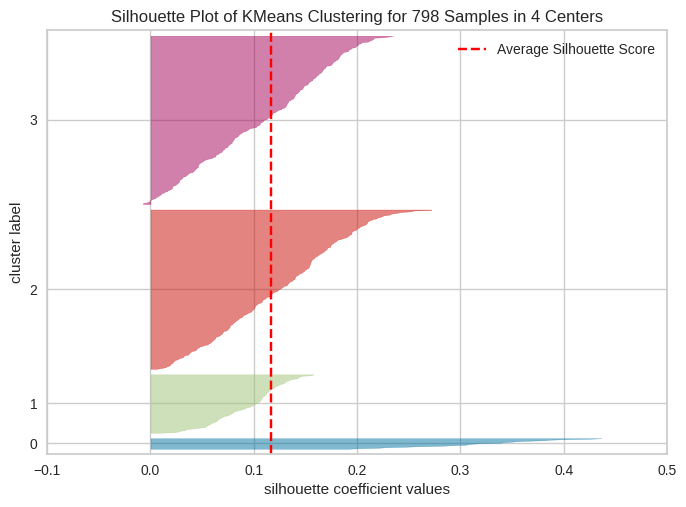

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 798 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
# k-means using k=4
np.random.seed (43)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_result = kmeans.fit(scaled_data)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data)
visualizer.show()

### **k-means algorathem where k=5**

Cluster Centers:
[[-0.13710978 -0.14915634  0.09931012  0.03290751  0.04743784 -0.16972109
  -0.07135368  0.12193835 -0.06872169  0.13815226  0.45480045  0.46389596
  -0.07379589  1.55857647]
 [-0.25571068  0.79716264  0.2593552   0.76112641  0.29098692 -0.05184199
  -0.2356925   0.24704041 -0.03772089 -0.18154485 -0.86259473 -0.90331839
  -0.10888674 -0.15094033]
 [ 0.02169687 -0.0763227   0.01388729  0.07839673  0.06177046 -0.14338975
  -0.17802274 -0.09645973  0.19780001  0.04471788  0.82966324  0.83305071
   0.05152855 -0.64945836]
 [ 0.24425101 -0.32914631 -0.23084651 -0.63477276 -0.27653739 -0.07451904
  -0.01647167 -0.13309033 -0.16124937 -0.0342022  -0.87142688 -0.85346487
   0.04653119 -0.27455921]
 [-0.08553098  0.36077341 -0.22562988  0.34431396 -0.17989918  4.02171496
   4.28338252  0.07813578 -0.11149853 -0.11102141  0.31614657  0.28205463
   0.11958353  0.16655824]]

Cluster Labels:
[2 2 3 4 2 3 3 1 2 1 0 0 2 2 2 1 0 1 3 2 2 0 3 0 1 0 2 1 0 2 0 3 1 2 3 0 0
 0 3 2 1 1 3 2 

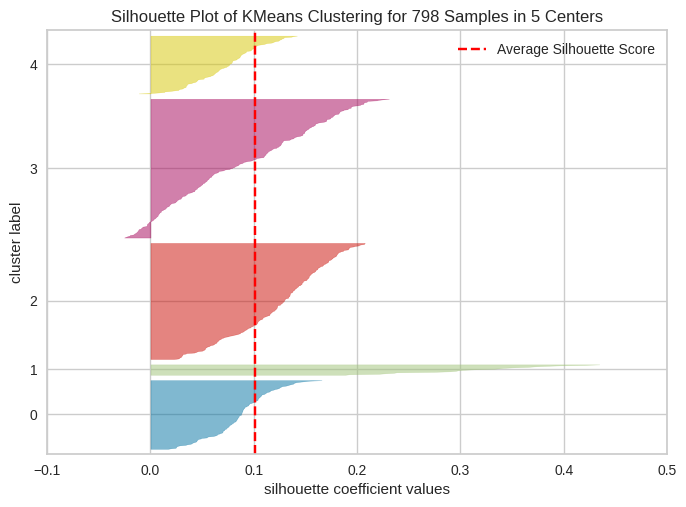

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 798 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
# k-means using k=5
np.random.seed (44)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_result = kmeans.fit(scaled_data)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

kmeans = KMeans(n_clusters=5,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data)
visualizer.show()

### **k-means algorathem where k=7**

Cluster Centers:
[[-8.10994605e-03 -1.24843903e-01 -7.17319155e-02 -2.82886282e-01
  -2.78146993e-02  1.08558787e-02 -9.56913358e-02  1.30952888e-01
  -2.33174867e-01  2.05069860e+00  1.34984574e-01  1.17743574e-01
  -3.34915500e-02  1.39148051e-01]
 [-2.53351670e-01  8.46495981e-01 -1.63831474e-01  3.63389391e-01
   2.70669460e-01 -1.49088861e-01 -2.84015149e-01  1.54223155e-01
  -1.36847764e-01 -2.52117278e-01 -1.05037822e+00 -1.03776577e+00
  -2.80293446e-01 -2.22203122e-01]
 [ 6.58551231e-02 -3.91714938e-02  1.79767972e+00 -2.05608438e-01
   6.90305397e-02 -1.93657781e-01 -4.27304958e-02  9.77037155e-02
  -7.03916546e-02 -2.80407399e-01 -4.67192879e-02 -7.89902095e-02
  -6.13562802e-02  2.99954764e-01]
 [ 2.93147446e-01 -5.81815506e-01 -4.92489409e-01 -5.13261341e-01
  -2.66286559e-01 -7.39746800e-03 -3.94768797e-03 -9.36008200e-02
  -2.00143100e-01 -3.71914900e-01 -7.79138331e-01 -7.65958519e-01
   1.90183352e-01  4.47246364e-02]
 [-2.55513224e-01  3.63552426e-03 -2.29985419e-01  

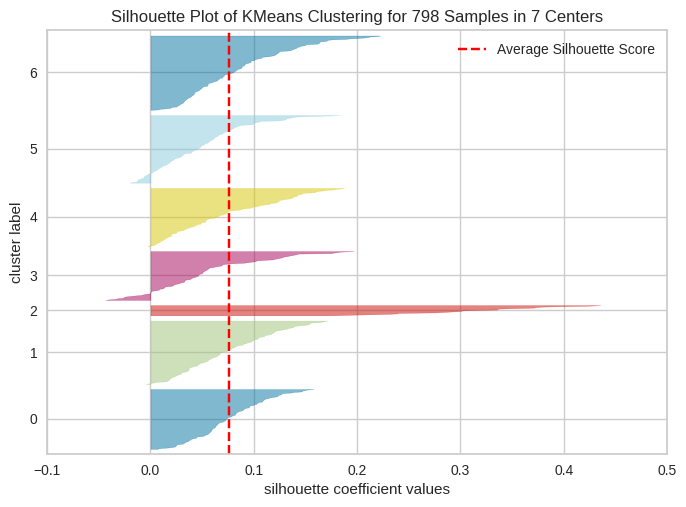

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 798 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [30]:
# k-means using k=7
np.random.seed (45)
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_result = kmeans.fit(scaled_data)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

kmeans = KMeans(n_clusters=7,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data)
visualizer.show()

## **Results Comparison & Interpretation**

### **Metrics Comparison**

In [32]:
# Define k values
k_values = [4, 5, 7]
results = {}

# Run KMeans and store inertia & silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_data)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(scaled_data, labels)
    results[k] = {
        'inertia': inertia,
        'silhouette': silhouette
    }

# Print formatted comparison
print(f"{'k':<5}{'Inertia':<15}{'Silhouette Score':<20}")
for k in k_values:
    print(f"{k:<5}{results[k]['inertia']:<15.2f}{results[k]['silhouette']:<20.4f}")

# Identify the best k (highest silhouette)
best_k = max(results, key=lambda k: results[k]['silhouette'])
print(f"\nBest k based on silhouette score: {best_k} (Score: {results[best_k]['silhouette']:.4f})")


k    Inertia        Silhouette Score    
4    8931.66        0.0865              
5    8484.05        0.0868              
7    7889.37        0.0798              

Best k based on silhouette score: 5 (Score: 0.0868)


As discussed before a closer silhouette score to 1 the better and the closest k-value is 5 so it will be chosen

### **Cluster Characteristics (k=5)**

<Figure size 1500x800 with 0 Axes>

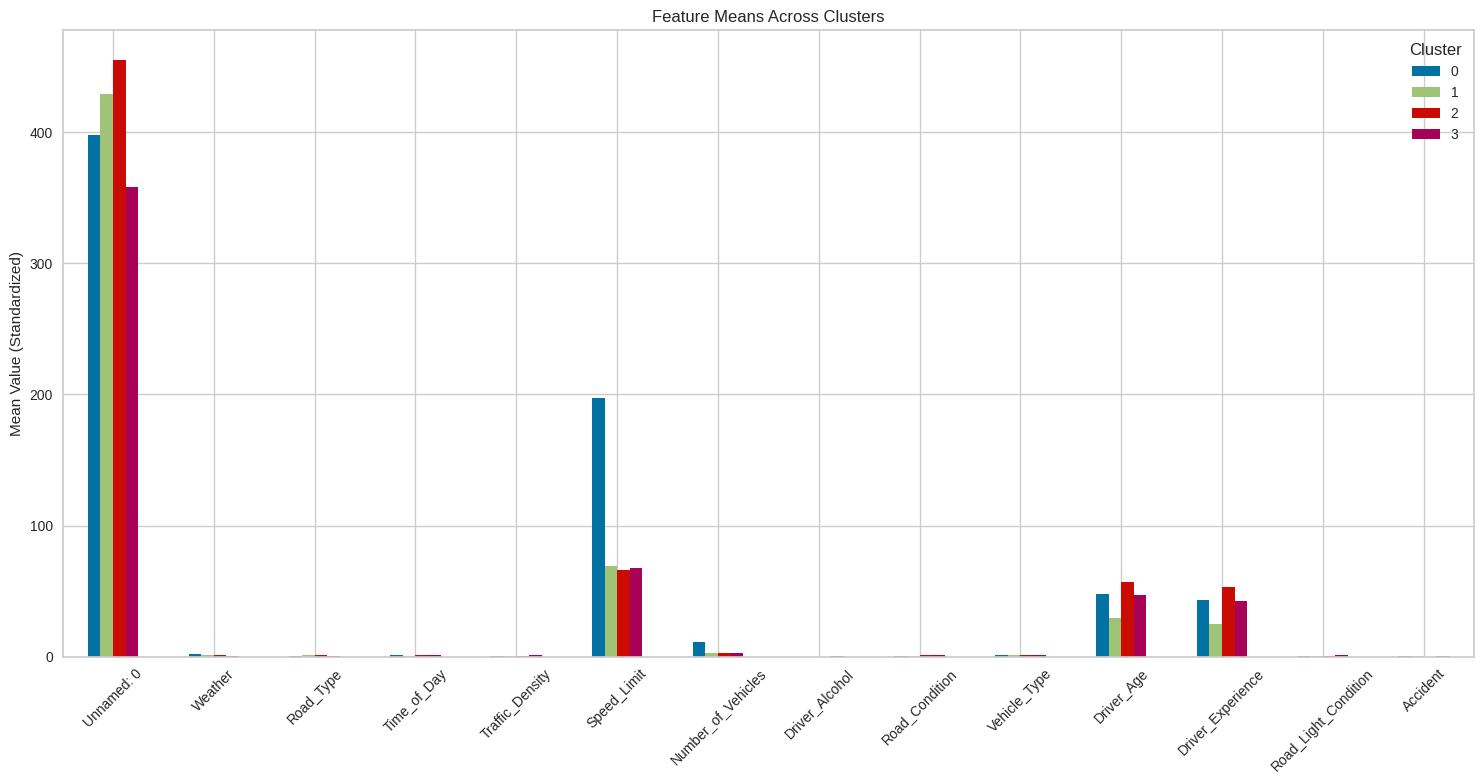

In [ ]:
best_k = 5
df['Cluster'] = results[best_k]['labels']
cluster_stats = df.groupby('Cluster').mean()

plt.figure(figsize=(15, 8))
cluster_stats.T.plot(kind='bar', figsize=(15, 8))
plt.title('Feature Means Across Clusters')
plt.ylabel('Mean Value (Standardized)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

 **Interpretation:**  
- Clusters with high (Speed_Limit) may indicate accident-prone zones.  
- Differences in (Weather_Conditions) could suggest environmental risk factors.  